In [1]:
# Dependencies
import pandas as pd
from pandas import DataFrame
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import func
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#read measurement csv
measurement = pd.read_csv("hawaii_measurements.csv")
measurement.head()


,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
#read stations csv
stations = pd.read_csv("hawaii_stations.csv")
stations.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [4]:
#clean up and save
measurement.dropna(inplace = True)
stations.dropna(inplace = True)
measurement.to_csv('clean_measurement_data.csv')
stations.to_csv('clean_stations_data.csv')

In [5]:
# create an engine for hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
# Perform a query to retrieve the data and precipitation scores
import datetime as dt
#find the date one year from today
year_ago = dt.date.today() - dt.timedelta(days=365)
# query
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    group_by(Measurement.date).all()
results

[('2017-07-13', 0.68),
 ('2017-07-14', 0.68),
 ('2017-07-15', 0.1),
 ('2017-07-16', 0.5),
 ('2017-07-17', 0.39),
 ('2017-07-18', 2.4),
 ('2017-07-19', 0.27),
 ('2017-07-20', 0.7),
 ('2017-07-21', 0.1),
 ('2017-07-22', 4.0),
 ('2017-07-23', 0.8),
 ('2017-07-24', 0.84),
 ('2017-07-25', 0.3),
 ('2017-07-26', 0.3),
 ('2017-07-27', 0.0),
 ('2017-07-28', 0.4),
 ('2017-07-29', 0.3),
 ('2017-07-30', 0.3),
 ('2017-07-31', 0.0),
 ('2017-08-01', None),
 ('2017-08-02', 0.25),
 ('2017-08-03', 0.06),
 ('2017-08-04', 0.0),
 ('2017-08-05', None),
 ('2017-08-06', None),
 ('2017-08-07', 0.05),
 ('2017-08-08', 0.34),
 ('2017-08-09', 0.15),
 ('2017-08-10', 0.07),
 ('2017-08-11', None),
 ('2017-08-12', 0.14),
 ('2017-08-13', None),
 ('2017-08-14', 0.22),
 ('2017-08-15', 0.42),
 ('2017-08-16', 0.42),
 ('2017-08-17', 0.13),
 ('2017-08-18', None),
 ('2017-08-19', 0.09),
 ('2017-08-20', None),
 ('2017-08-21', 0.56),
 ('2017-08-22', 0.5),
 ('2017-08-23', 0.45)]

In [10]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
#transfer list to dataframe
results_df = pd.DataFrame(results, columns=['date','prcp'])
results_df.set_index('date', inplace = True)
results_df.dropna(inplace = True)
results_df.head()


,prcp
date,
2017-07-13,0.68
2017-07-14,0.68
2017-07-15,0.10
2017-07-16,0.50
2017-07-17,0.39


<IPython.core.display.Javascript object>


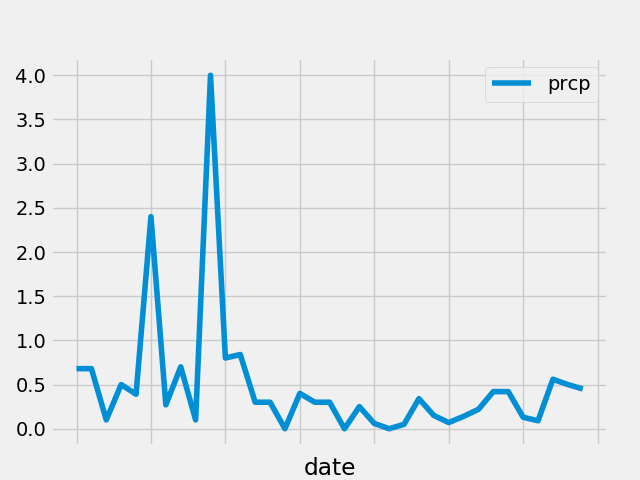

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
results_df.plot()
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,prcp
count,35.000000
mean,0.483143
std,0.743382
min,0.000000
25%,0.115000
50%,0.300000
75%,0.500000
max,4.000000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.id)).scalar()

9

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.station,\
             func.count(Measurement.station),\
             func.min(Measurement.tobs),\
             func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

[('USC00519281', 2772, 54.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
session.query(func.count(Measurement.tobs), Measurement.station).\
    filter(Measurement.date > year_ago).\
    order_by(func.count(Measurement.tobs).desc()).first()

(212, 'USC00516128')

In [17]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00516128').\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()
tobs

[('2017-07-13', 77.0),
 ('2017-07-14', 76.0),
 ('2017-07-15', 78.0),
 ('2017-07-16', 75.0),
 ('2017-07-17', 72.0),
 ('2017-07-18', 77.0),
 ('2017-07-19', 74.0),
 ('2017-07-20', 75.0),
 ('2017-07-21', 72.0),
 ('2017-07-22', 72.0),
 ('2017-07-23', 78.0),
 ('2017-07-24', 77.0),
 ('2017-07-25', 79.0),
 ('2017-07-26', 73.0),
 ('2017-07-27', 75.0),
 ('2017-07-28', 73.0),
 ('2017-07-29', 77.0),
 ('2017-07-30', 79.0),
 ('2017-07-31', 74.0),
 ('2017-08-01', 72.0),
 ('2017-08-02', 80.0),
 ('2017-08-03', 76.0),
 ('2017-08-05', 77.0),
 ('2017-08-06', 79.0),
 ('2017-08-07', 78.0),
 ('2017-08-08', 74.0),
 ('2017-08-09', 71.0),
 ('2017-08-10', 75.0),
 ('2017-08-11', 72.0),
 ('2017-08-12', 74.0),
 ('2017-08-13', 80.0),
 ('2017-08-14', 79.0),
 ('2017-08-15', 70.0),
 ('2017-08-16', 71.0),
 ('2017-08-17', 72.0),
 ('2017-08-18', 76.0),
 ('2017-08-19', 71.0),
 ('2017-08-20', 78.0),
 ('2017-08-21', 76.0),
 ('2017-08-22', 76.0),
 ('2017-08-23', 76.0)]

In [18]:
#transfer to dataframe
tobs_df = pd.DataFrame(tobs, columns=['Date','Tobs'])
tobs_df

,Date,Tobs
0,2017-07-13,77.0
1,2017-07-14,76.0
2,2017-07-15,78.0
3,2017-07-16,75.0
4,2017-07-17,72.0
5,2017-07-18,77.0
6,2017-07-19,74.0
7,2017-07-20,75.0
8,2017-07-21,72.0
9,2017-07-22,72.0


<IPython.core.display.Javascript object>


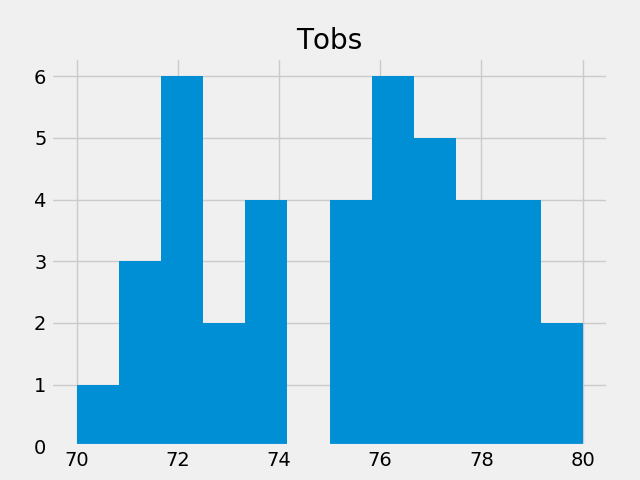

<function matplotlib.pyplot.show(*args, **kw)>

In [19]:
#plot
tobs_df.hist(bins=12)
plt.show